In [2]:
import math
import numpy as np
from scipy import optimize
from matplotlib import pyplot

In [3]:
def custom_function (arg):
    return math.sin(arg / 5.) * math.exp(arg / 10.) + 5. * math.exp(-arg / 2.)

def custom_vector_function(arg_Vector):
    return np.array( map(custom_function, arg_Vector) )

In [4]:
values_x = np.arange(1, 30, 0.1)
values_y = custom_vector_function(values_x)
print "x (min, max, shape) -", values_x[0], values_x[-1], values_x.shape
print "y (first, last, shape) -", values_y[0], values_y[-1],values_y.shape

x (min, max, shape) - 1.0 29.900000000000027 (290L,)
y (first, last, shape) - 3.252216865271419 -5.937102407424487 (290L,)


In [6]:
x_bias = values_x[0]

differential_bounds = [(1, 30)]

min_result = optimize.differential_evolution(func=custom_function, bounds = differential_bounds)
min_point = (min_result.x[0], values_y[int((min_result.x[0]-x_bias)*10)])

print "Optimisation: OK = ", min_result.success, " Message = ", min_result.message, "Result = ", min_result.x
print "Calculated min, point = ", min_point, " / x-bias = ", x_bias

Optimisation: OK =  True  Message =  Optimization terminated successfully. Result =  [25.88019733]
Calculated min, point =  (25.880197332640076, -11.896991866210282)  / x-bias =  1.0


Min. value of func (check) =  -11.898777807806216
Min. value index  (check) =  25.9

Min. value of func (calculated) =  -11.896991866210282
Min. value index  (calculated) =  25.880197332640076


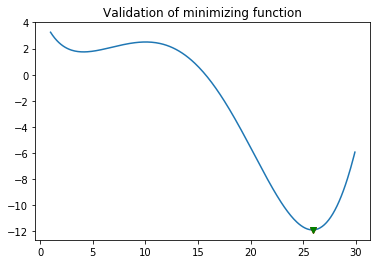

Approximation error =  [0.01980267]

Answer:  -11.90


In [7]:
check_min_value_func = values_y.min()
check_min_value_index = x_bias + (np.where(values_y == values_y.min())[0])/10.
    
print "Min. value of func (check) = ", check_min_value_func
print "Min. value index  (check) = ", check_min_value_index[0]

print "\nMin. value of func (calculated) = ", min_point[1]
print "Min. value index  (calculated) = ", min_point[0]

pyplot.title("Validation of minimizing function")

pyplot.plot(values_x, values_y)
pyplot.plot(min_point[0], min_point[1], "rv")
pyplot.plot(check_min_value_index, check_min_value_func, "gv")
pyplot.show()

print "Approximation error = ", abs(min_point[0] - check_min_value_index)

print "\nAnswer: ", "{0:.2f}".format(min_point[1])

In [ ]:
print "Result validation check:"
with np.printoptions(precision=3, suppress=True):
    print(values_y)